Author - Andrew W. Jackura

Email - ajackura@odu.edu / ajackura@jlab.org

# Scattering Amplitudes

This notebook examines features of scattering amplitudes. We focus on $\mathbf{2}\to\mathbf{2}$, where the $\mathbf{2}$ refers to the number of hadrons in the initial/final state. Moreover, we assume that the hadrons are spinless particles, e.g. the $\pi$.

The scattering amplitude is defined as
$$
\langle\mathbf{2}|S-1|\mathbf{2}\rangle = (2\pi)^{4}\delta(P'-P) \, i\mathcal{M}(E^{\star},\theta^{\star}) \, ,
$$
where $S$ is the $S$ matrix and the $-1$ removes the cases where the particles do not scatter. Here, $E^{\star}$ is the *center-of-momentum* (CM) frame energy and $\theta^{\star}$ is the CM frame scattering angle.

We focus on the partial wave projected scattering amplitude, $\mathcal{M}_{\ell}(s)$, where $\ell$ is the angular momentum between the two hadrons. This is defined via
$$
    \mathcal{M}_{\ell}(s) = \frac{1}{2} \int_{-1}^{1}\!\mathrm{d}\cos\theta \, P_{\ell}(\cos\theta) \mathcal{M}(s,\theta) \, .
$$
In this notebook we will focus on $S$ wave, that is $\ell = 0$, partial wave amplitudes, and study elementary properties which are necessary to understand the hadron spectrum.


#### References

Scattering theory is a rather old topic, and there are many books/ papers on the subject. I find the following books useful:
* *Strong Interactions of Hadrons at High Energies* - Gribov
* *Dispersion Relation Dynamics* - Burkhardt
* *High Energy Hadron Physics* - Perl
* *The Analytic S-Matrix* - Eden, Landshoff, Olive, Polkinghorn
* *Elementary Particle Theory* - Martin & Spearman

For a rather good book on non-relativistic scattering theory, which establishes many of the concepts we use, check out
* *Scattering Theory* - Taylor

The following is the *best* (imo) book on kinematics for particle physics:
* *Particle Kinematics* - Byckling & Kajante

The Joint Physics Analysis Center (JPAC) hosted two summer schools on the fundamentals of scattering theory. For our purposes, the 2017 Team 1 and 2 lectures are most useful
* <http://cgl.soic.indiana.edu/jpac/schools.html>

In [2]:
'''
Importing useful libraries
'''
import cmath as cm                          # math library (complex)
import math as m                            # math library
import numpy as np                          # basic functions, linear algebra, etc.
import scipy.special as sp                  # special functions
import numpy.random as rn                   # random numbers
import matplotlib.pyplot as plt             # plotting library
from scipy import optimize                  # numerical root finding
from scipy import integrate                 # library for integration
from mpl_toolkits import mplot3d            # for 3d plotting 
from matplotlib.colors import hsv_to_rgb    # convert the color from HSV coordinates to RGB coordinates
from colorsys import hls_to_rgb             # convert the color from HLS coordinates to RGB coordinates    

## Complex Square Root

It is convenient for us to define the square root function to have a branch cut along $z\in [0,\infty)$. We use the following definition: 

$\sqrt{z} \longrightarrow i \sqrt{-z}$



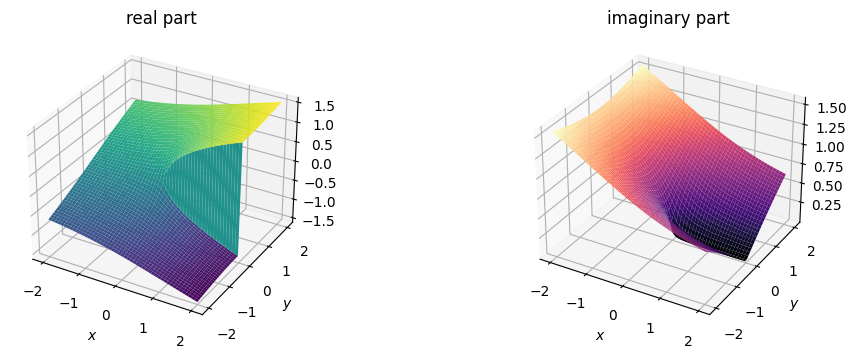

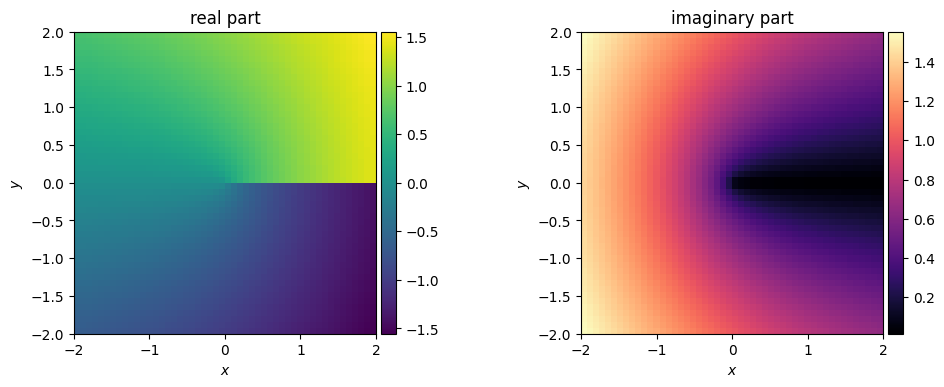

In [3]:
# my definition of square root
def mySqrt( z ):
    return 1j * np.sqrt( -z )


# let's plot this to make sure the cut is oriented correctly
def argand_plot_3D(func):
    xmin, xmax, xnum = -2, 2, 50
    ymin, ymax, ynum = -2, 2, 50
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(121, projection='3d')
    ax2 = plt.gcf().add_subplot(122, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_title('imaginary part')

def cmap_plot_2D(func, fig):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    xmin, xmax, xnum = -2, 2, 50
    ymin, ymax, ynum = -2, 2, 50
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(121)
    ax2 = plt.gcf().add_subplot(122)
    image = func(Z)
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes('right', size='5%', pad=0.05)
    im1 = ax1.imshow(np.real(image), cmap='viridis', vmin = np.min(np.real(image)), vmax = np.max(np.real(image)), \
        extent = [xmin, xmax, ymin, ymax], origin = 'lower')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_title('real part')
    fig.colorbar(im1, cax1, orientation='vertical')

    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes('right', size='5%', pad=0.05)
    im2 = ax2.imshow(np.imag(image), cmap='magma', vmin = np.min(np.imag(image)), vmax = np.max(np.imag(image)), \
        extent = [xmin, xmax, ymin, ymax], origin = 'lower')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_title('imaginary part')
    fig.colorbar(im2, cax2, orientation='vertical')

# 3D plot
plt.figure(figsize=(12,4), dpi= 100)
argand_plot_3D(mySqrt)

# 2D plot
fig = plt.figure(figsize=(12,4), dpi= 100)
cmap_plot_2D(mySqrt, fig)

## Two-particle Kinematics

A single particle of mass $m$ and carrying momentum $\mathbf{p}$ has a four-momentum $p = (\omega_p,\mathbf{p})$ where $\omega_p = \sqrt{m^2 + \mathbf{p}^2}$ is the energy of the particle. A two-particle system has a total four-momentum
$$
P = (E,\mathbf{P}) = p_1 + p_2 = (\omega_{p_1}+\omega_{p_2},\mathbf{p}_1+\mathbf{p}_2) \, ,
$$
where $\omega_{p_1} = \sqrt{m^2 + \mathbf{p}_1^2}$ and $\omega_{p_2} = \sqrt{m^2 + \mathbf{p}_2^2}$ are the individual particle energies.
There is one special frame we will consider repeatedly, which is the <em>center-of-momentum</em> (CM) frame. The CM frame is defined as one where the total momentum of the two-particle system is zero, i.e. $\mathbf{P}^{\star} = \mathbf{0}$, where the $\star$ is a conventional notation to indicate the kinematic quantity is evaluated in the CM frame.

A useful Lorentz invariant, called the Mandelstam invariant $s$ or invariant mass-squared of the system, is defined as the CM energy-squared, i.e.,
$$
s \equiv (p_1 + p_2)^2 = E^{\star\,2} = E^2 - \mathbf{P}^2 = P_{\mu}P^{\mu} \, ,
$$
which gives a connection between the CM frame and some general moving frame defined by $\mathbf{P}$. In the CM frame, $\mathbf{p}_1^{\star} = -\mathbf{p}_2^{\star} \equiv \mathbf{q}^{\star}$, where the last equality defines the relative CM frame momentum between the two particles. The magnitude of the relative CM momentum is fixed by $s$ (the angles remain free to take on any physical value) and is given by
$$
\begin{align}
q^{\star} = \frac{1}{2}\sqrt{s-4m^2} \, ,
\end{align}
$$
where holds for degenerate masses.

<br />

### Exercises:

1. What is the minimum value of $s$, $E^{\star}$ in a physical system?

2. Show that $q^{\star} = \sqrt{s / 4 - m^2}$ for equal mass particles starting from the definition of $s$.

3. Plot $q^{\star} / m$ as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$.

4. Show that in the equal mass case, each particle has an energy $\omega^{\star} = \sqrt{s} / 2$.

5. **Bonus** - For un-equal masses, show that the relative CM momentum is
$$
q^{\star} = \frac{1}{2\sqrt{s}} \sqrt{ (s - (m_1+m_2)^2) (s - (m_1-m_2)^2) } \, .
$$

6. **Bonus** - For un-equal masses, show that each particle has a CM energy 
$$
\omega_{p_1}^{\star} = \frac{s + m_1^2 - m_2^2}{2\sqrt{s}} \, \qquad \omega_{p_2}^{\star} = \frac{s + m_2^2 - m_1^2}{2\sqrt{s}} \, .
$$

7. **Bonus** - Another special frame is the <em>target system</em> (TS) frame, which is defined such that $\mathbf{p}_1^{T} = \mathbf{P}^{T}$, that is, particle 2 is at rest ($\mathbf{p}_2^T = \mathbf{0}$). What is the magnitude of the momentum and energy of particle 1, i.e. $p_1^T$ and $\omega_{p_1}^{T}$?

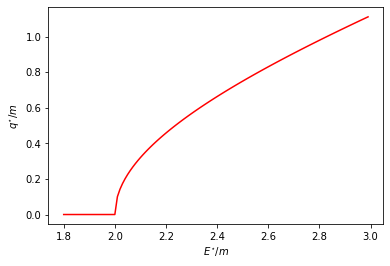

In [3]:
# work in units where m = 1
m = 1.0

# defining q_cm in terms of s
def q_cm( s ):
    return 0.5 * mySqrt( s - 4.0 * m**2 )

# Simple plot routine
def simple_plot(func):
    eps = 1e-16                                                 # shift s value slightly above real axis
    Ecm_o_m = np.arange(1.8, 3, 0.01)                           # array of Ecm / m
    plt.plot(Ecm_o_m, np.real(func(Ecm_o_m**2+1j*eps)), 'r')
    plt.xlabel(r'$E^{\star}/m$')
    plt.ylabel(r'$q^{\star} / m$')
    
# Let us plot the momentum
simple_plot(q_cm)

## Two-particle Phase Space

A special kinematic function that appears in the study of scattering amplitudes is the two-body kinematic phase space function. This function characterizes the allowed energy domain that is accessible to a physical two-particle system.
We will look at this function from the context of a 1-loop integral in scalar field theory. Consider the integral
$$
i\mathcal{I}(P) = \xi \int\! \frac{\mathrm{d}^4k}{(2\pi)^4} \, \frac{i}{k^2 - m^2 + i\epsilon} \frac{i}{(P-k)^2 - m^2 + i\epsilon} \, ,
$$
which arises from the two-particle loop shown below. NOTE: We have neglected to include couplings from the vertices, but these are just (irrelevant for our purposes) multiplicative constants. The factor $\xi = 1/2$ for identical particles ($\xi = 1$ for distinguishable particles), and $P$ is the total momentum flowing through the system while $k$ is the loop momenta. If this was a standard QFT course, we would identify that this is a divergent integral, which needs regularization, evaluation with Feynman parameters, and eventual renormalization of the parameters of the theory. Here however, we are not interested in the diagram as a whole, but the piece of the diagram for which the virtual particles can go on their mass shell. Therefore, we will project this diagram on-shell, extracting the piece associated with physical scattering of the intermediate state. We will find that this on-shell piece is UV finite (as one expects for physical processes), and is associated with singularities of the function, explicitly that
$$
\mathrm{Im}\, \mathcal{I} = \rho(s) \Theta(E^{\star} - 2m) \, ,
$$
where 
$$
\rho(s) = \frac{\xi q^{\star}}{8\pi \sqrt{s}} \, 
$$
is the *two-body phase space*.

<br />

### Exercises:

1. Derive the result $\mathrm{Im}\, \mathcal{I} = \rho(s) \Theta(E^{\star} - 2m)$.

2. What are the dimensions of $\rho$?

3. Show that
$$
\lim_{s\to \infty} \frac{16\pi}{\xi}\rho(s) = 1\, .
$$

4. Plot $\rho(s)$ as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$

5. Plot the real and imaginary parts of $\rho$ in the complex $s$-plane. Show there is a disconituity in the function about the real axis. Where is the branch point?

6. **Bonus** - Repeat the analytic derivation for un-equal masses $m_1$ and $m_2$ (You should find $\rho$ takes the same structure)

7. **Bonus** - Using the Schwartz reflection principle ($f(z) = f^{*}(z^{*})$ given a region on the real axis where the function is real), show that the imaginary part of a function is related to the discontinuity across the real axis (indicating there exist a branch cut), with $\mathrm{Disc} \, f(z) = f(x + i\epsilon) - f(x - i\epsilon)$ where $x = \mathrm{Re}\,z$.

8. **Bonus** - The function $\rho$ may look familiar if you've calculated a cross section in QFT. This function arises from the generic two-body phase space integral
$$
\mathrm{d}\Phi_{2}(p_1 + p_2 \to P) = \xi \frac{\mathrm{d}^3\mathbf{p}_1}{(2\pi)^3 \, 2\omega_1} \frac{\mathrm{d}^3\mathbf{p}_2}{(2\pi)^3 \, 2\omega_2} \, (2\pi)^4 \delta(P - p_1 - p_2) \, .
$$ 
Integrate $\mathrm{d}\Phi_2$ overall all allowed momentum, and recover $\rho$.

9. **Bonus** - Repeat this exercise of a system in $1+1$ spacetime dimensions. What is $\rho_{1+1}$? What is it's dimensions?

10. **Bonus** - Find the discontinuity of $i\mathcal{I}$ using Cutkoski rules.

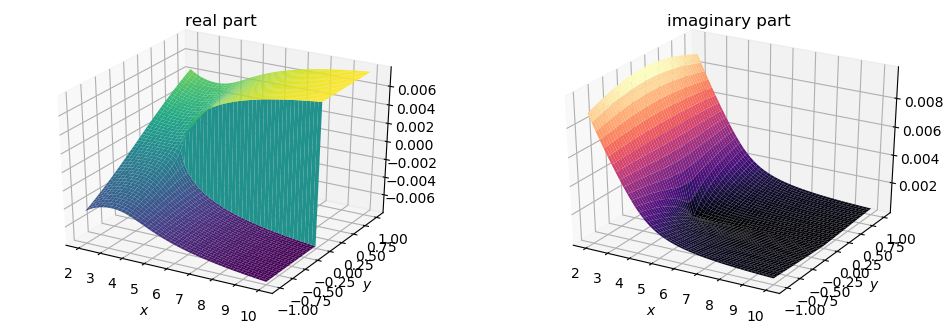

In [4]:
# Let us work with ideentical particles throughout
xi = 0.5 # symmetry factor

# Phase space factor
def phase_space( s ):
    return xi * q_cm( s ) / ( 8.0 * np.pi * np.sqrt(s) )

# Routine to plot phase space function in complex s-plane
def phase_space_plot_3D(func):
    xmin, xmax, xnum = 2, 10, 50                        # units of m
    ymin, ymax, ynum = -1, 1, 50                        # units of m
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(121, projection='3d')
    ax2 = plt.gcf().add_subplot(122, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_title('imaginary part')

# Making plot
plt.figure(figsize=(12,4), dpi= 100)
phase_space_plot_3D(phase_space)

## On-Shell Amplitude

Generally, the on-shell amplitude in the elastic scattering kinematic region (i.e. $2m\le E^{\star} < 3m$) can be expressed in terms of the $K$ matrix, which is a real function in this domain

$$
\mathcal{M}(s) = \mathcal{K}(s)\frac{1}{1-i\rho(s) \mathcal{K}(s)}
$$

The $K$ matrix itself can be expressed in terms of the scattering <em>phase shift</em> ($\delta$), which has analogous features to phase shifts seen in Non-relativistic quantum scattering (cf. <em>Scattering Theory</em> by J.R. Taylor). We define the $K$ matrix in terms of the phase shift via
$$
\mathcal{K}^{-1}(s) = \rho(s) \cot\delta(s) \, ,
$$
such that
$$
\mathcal{M}(s) = \frac{ 8\pi \sqrt{s} }{ \xi } \frac{1}{q^{\star}\cot\delta(s) - i q^{\star}} \, .
$$
Note that from scattering theory, we do not know the exact form of the $K$ matrix, which depends on the specifics of the interactions. All we know is that $\mathcal{K}$ is a real analytic function of $s$ in our kinematic region of interest. We will determine the specific form of the $K$ matrix via the Luescher quantization condition. In data analysis, there are two common parameterizations we should be aware of, the effective range and the Breit-Wigner parameterizations.

<br />

### Effective Range
Since the $K$ matrix is an analytic function in the region around the threshold, we can Taylor expand it in a power series in $q^{\star\,2}$. This can be cast into the <em>effective range expansion</em>, defined here (keeping only the first two terms) as
$$
q^{\star}\cot\delta = -\frac{1}{a} + \frac{1}{2} r q^{\star\,2} \, ,
$$
where $a$ is the scattering length (characterizing the strength of interaction) and $r$ is the effective range (characterizing the range of interaction).

<br />

### Breit-Wigner

A common parameterization to describe resonance physics is the *Breit-Wigner* parameterization, which can be expressed in our case as
$$
\tan\delta(s) = \frac{\sqrt{s} \Gamma(s) }{ m_0^2 - s }
$$
where $\Gamma$ is defined by
$$
\Gamma(s) = \frac{g_0^2}{6\pi} \frac{m_0^2}{s} q^{\star} \, .
$$

NOTE: It is tempting to say that $m_0$ and $g_0$ are the mass and coupling of the resonance, this is not true. In the limit where the resonance is extremely narrow, one can find that this is true to leading order (Exercise), but in general this is not true. These are parameters (which for historical reasons we call the Breit-Wigner mass and coupling), which we could have just as easily called $c_0$ and $c_1$

<br />

### Exercises:

1. What are the dimensions of $\mathcal{M}$, $\mathcal{K}$, and $\delta$?

2. What are the dimensions of $a$ and $r$?

3. What are the dimensions of $m_0$ and $g_0$?

4. Plot $\mathcal{M}$ as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$ for the Effective range using $ma = 2$ and $-2$, and $mr = 0$.

5. Compare the Breit-Wigner amplitudes for $m_0/m = 2.5$ and $g_0 = 1,2,3$

6. Plot the amplitude in the complex $s$-plane


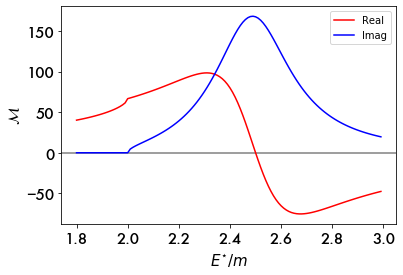

<Figure size 200x100 with 0 Axes>

In [11]:
'''
Amplitudes
'''

# General amplitude function
def Amplitude( s, Kmatrix ):
    K = Kmatrix(s)
    rho = phase_space(s)
    return K / ( 1.0 - 1j * rho * K )

# K-matrix for Breit-Wigner parameterization
def Kmatrix_BreitWigner( s, m0, g0 ):
    Gamma = g0**2 * m0**2 * q_cm(s) / ( 6.0 * np.pi * s )
    tanDelta = np.sqrt( s ) * Gamma / ( m0**2 - s )
    rho = phase_space(s)
    return tanDelta / rho

# K-matrix for 2-parameter Effective Range parameterization
def Kmatrix_EffectiveRange( s, a, r ):
    qCotDelta = -1.0 / a + 0.5 * r * q_cm( s )**2
    return ( 8.0 * np.pi * np.sqrt(s) / xi ) / qCotDelta

# Routine to plot amplitude
def plot_amplitude( Kmatrix ):
    eps = 1e-16                                                 # shift s value slightly above real axis
    Ecm_o_m = np.arange(1.8, 3, 0.01)                           # array of Ecm / m
    amp = Amplitude( Ecm_o_m**2+1j*eps, Kmatrix )
    plt.axhline(y=0.0, color='gray', linestyle='-')
    plt.plot(Ecm_o_m, amp.real, color='red',label="Real")
    plt.plot(Ecm_o_m, amp.imag, color='blue',label="Imag")
    plt.xlabel(r'$E^{\star} / m$',size=15)
    plt.ylabel(r'$\mathcal{M}$',size=15)
    plt.xticks(fontname="Futura",fontsize=15)
    plt.yticks(fontname="Futura",fontsize=15)
    plt.legend(loc="upper right")
    plt.figure(figsize=(2,1), dpi= 100, facecolor='w', edgecolor='k')

# Sample Effective Range parameters
a = 2 # /m
r = 0 # /m

# Sample Breit-Wigner parameters
m0 = 2.5 # m
g0 = 3.0

# Plot Breit-Wigner
plot_amplitude( lambda s:Kmatrix_BreitWigner(s,m0,g0) )

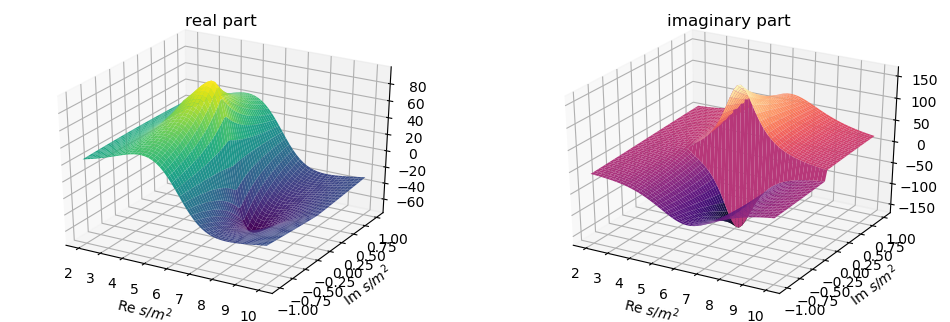

In [6]:
# 3D plot of amplitude

def amplitude_argand_plot_3D(Kmatrix):
    xmin, xmax, xnum = 2, 10, 50                        # units of m
    ymin, ymax, ynum = -1, 1, 50                        # units of m
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    amp = Amplitude( Z, Kmatrix )
    ax1 = plt.gcf().add_subplot(121, projection='3d')
    ax2 = plt.gcf().add_subplot(122, projection='3d')
    ax1.plot_surface(X, Y, np.real(amp), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'Re $s / m^2$')
    ax1.set_ylabel(r'Im $s / m^2$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(amp), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'Re $s / m^2$')
    ax2.set_ylabel(r'Im $s / m^2$')
    ax2.set_title('imaginary part')

# Making plot
plt.figure(figsize=(12,4), dpi= 100)
amplitude_argand_plot_3D(lambda s:Kmatrix_BreitWigner(s,m0,g0))

## Unitarity

An important property of scatterring amplitudes is the <em>Unitarity constraint</em>, which restricts the imaginary part of the amplitude. For $\mathbf{2}\to\mathbf{2}$ systems, the unitarity condition can be expressed as
$$
\mathrm{Im} \, \mathcal{M}(s) = \rho(s) \lvert \mathcal{M}(s) \rvert^2 \Theta(\sqrt{s} - 2m) \, ,
$$
The Heaviside function $\Theta(\sqrt{s} - 2m)$ enforces that the imaginary part of the amplitude is non-zero above the scattering threshold only. This condition enforces various consequences:
* The amplitude has a general form $\mathcal{M} = \mathcal{K} / ( 1 - i \rho \mathcal{K})$
* The amplitude has a discontinuity above the scattering threshold
* $|\rho\mathcal{M}| \le 1$

<br />

### Exercises:

1. Analytically confirm that the $K$ matrix representation satisfies the unitarity relation

2. Given the unitarity condition, what is $\mathrm{Im} \,\mathcal{M}^{-1}$?

3. Show numerically that $\mathrm{Im} \, \mathcal{M}(s) = \rho(s) \lvert \mathcal{M}(s) \rvert^2 \Theta(\sqrt{s} - 2m)$

4. Plot $|\rho(s)\mathcal{M}(s)|$ in the energy region $1.8 \le E^{\star}/m \le 3$ for both the Breit-Wigner and Effective Range amplitudes

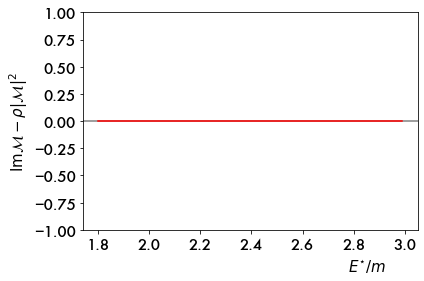

<Figure size 200x100 with 0 Axes>

In [7]:
def unitarity_check( s, Kmatrix ):
    amp = Amplitude( s, Kmatrix )
    rho = phase_space(s)
    return amp.imag - rho * np.abs( amp )**2

# Routine to plot amplitude
def plot_unitarity_check( Kmatrix ):
    eps = 1e-16                                                 # shift s value slightly above real axis
    Ecm_o_m = np.arange(1.8, 3, 0.01)                           # array of Ecm / m
    fcn = unitarity_check( Ecm_o_m**2+1j*eps, Kmatrix )
    plt.axhline(y=0.0, color='gray', linestyle='-')
    plt.plot(Ecm_o_m, fcn.real, color='red')
    plt.xlabel(r'$E^{\star} / m$', position=(.85,1),size=15)
    plt.ylabel(r'$\mathrm{Im}\mathcal{M} - \rho|\mathcal{M}|^2$',size=15)
    plt.xticks(fontname="Futura",fontsize=15)
    plt.yticks(fontname="Futura",fontsize=15)
    plt.ylim([-1, 1])
    plt.figure(figsize=(2,1), dpi= 100, facecolor='w', edgecolor='k')


# Make plot for Breit-Wigner
plot_unitarity_check(lambda s:Kmatrix_BreitWigner(s,m0,g0))

## Magnitudes and Phases

Instead of the real and imaginary parts, we can examine the magnitude and phase of the amplitude

$$
\mathcal{M}(s) = \lvert \mathcal{M}(s) \rvert \, e^{i\delta(s)}
$$
where $\delta$ is the phase of the amplitude, which is identical to the phase shift defined by the $K$ matrix.

### Exercises:

1. Using the magnitude/phase representation and unitarity, show that the phase of the amplitude is the same phase shift presented in the on-shell representation.

2. Show numerically that the phase of $\mathcal{M}$ is equal to the phase shift $\delta$, for both the effective range and Breit-Wigner amplitudes.

3. Plot magnitude and phase of the amplitude as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$ for the Effective range using $ma = 2$ and $ma = -2$, and $mr = 0$.

4. Plot the magnitude and phase for the Breit-Wigner for $m_0/m = 2.5$ and $g_0 = 1,2,3$. 

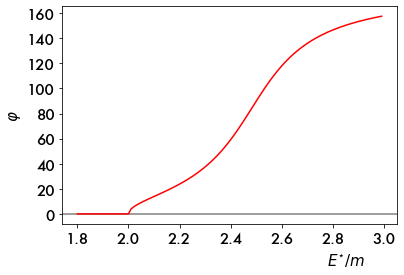

<Figure size 200x100 with 0 Axes>

In [8]:
# Magnitude of amplitude
def magnitude( amp ):
    return np.abs( amp )

# phase of amplitude
def phase( amp ):
    return 180.0 * np.arctan2( amp.imag, amp.real ) / np.pi

# Routine to plot amplitude
def plot_phase( Kmatrix ):
    eps = 1e-16                                                 # shift s value slightly above real axis
    Ecm_o_m = np.arange(1.8, 3, 0.01)                           # array of Ecm / m
    amp = Amplitude( Ecm_o_m**2+1j*eps, Kmatrix )
    ph = phase(amp)
    plt.axhline(y=0.0, color='gray', linestyle='-')
    plt.plot(Ecm_o_m, ph, color='red')
    plt.xlabel(r'$E^{\star} / m$', position=(.85,1),size=15)
    plt.ylabel(r'$\varphi$',size=15)
    plt.xticks(fontname="Futura",fontsize=15)
    plt.yticks(fontname="Futura",fontsize=15)
    plt.figure(figsize=(2,1), dpi= 100, facecolor='w', edgecolor='k')


# Make plot for Breit-Wigner
plot_phase(lambda s:Kmatrix_BreitWigner(s,m0,g0))

## Bound, Virtual, and Resonant States

We will now examine the spectroscopic content of our scattering system. From the discussion, we have learneed to associate particles with pole singularities of the scattering amplitudes. In particular:
* Bound states - pole singularities on the first Riemann sheet, on the real axis, and below scattering thresholds,
* Virtual states - pole singularities on the second Riemann sheet, on the real axis, and below scattering thresholds,
* Resonant states - pole singularities on the second Riemann sheet, in the complex $s$-plane (non-zero imaginary part), and above scattering thresholds.

Note that causality forbids resonances on the first Riemann sheet. 

Regardless of which case the particle is, there are two model-independent quantities which define the state: The *pole position* and the *residue at the pole*. We can write this as
$$
\mathcal{M}(s) \sim \frac{c_p^2}{s - s_p} \, ,
$$
where $c_p^2$ is the residue, $s_r$ the pole position. It is common to express the residue as the *coupling* of the state to the scattering channel, $c_p$, and to express the pole in terms of the mass and width $\sqrt{s_p} = m_p - i \Gamma_p / 2$. If the particle is a bound or virtual state, then $\Gamma_p = 0$.

To find these quantities in a practical case, we first find the pole position by lookings for zeroes of the inverse amplitude:
$$
\mathcal{M}^{-1}(s) = 0 \, .
$$
For bound states, we examine the amplitude on the first Riemann sheet, while for virtual or resonant state we must analytically continue the amplitude to the second Riemann sheet, i.e. $\mathcal{M}^{\mathrm{II}\,\,-1}(s) = 0$. Once the pole is found, the coupling is determine most easily using Cauchy's theorem,
$$
c_p^2 = \oint_{C} \! \frac{\mathrm{d}s}{2\pi i} \, \mathcal{M}(s) \, ,
$$
where $C$ is a contour around the pole.

<br />
<br />


### Analytic continuation
The second sheet amplitude is most easily found by using the unitarity condition $\mathrm{Im} \, \mathcal{M}(s) = \rho(s) | \mathcal{M}(s) |^2$. We first write the imaginary part in terms of the discontinuity of the amplitude across the real axis. We do this using the Schwartz reflection principle, which states that if a function $f(z)$ is real analytic on some region of the real axis, then $f(z) = f^*(z^*)$. Recalling that we define amplitudes by approaching the real axis from above, i.e. $\mathcal{M}(s) = \lim_{\epsilon \to 0} \mathcal{M}(s+i\epsilon)$, we can write the imaginary part as
$$
\begin{align}
2i \, \mathrm{Im}\, \mathcal{M}(s) & = \mathcal{M}(s) - \mathcal{M}^{*}(s) \\
%
%& = \mathcal{M}(s+i\epsilon) - \mathcal{M}^{*}(s+i\epsilon) \\
%
& = \mathcal{M}(s+i\epsilon) - \mathcal{M}(s-i\epsilon) \, ,
\end{align}
$$
where the last line is the discontinuity of the amplitude.

Now, the unitarity condition is
$$
\mathcal{M}(s+i\epsilon) - \mathcal{M}(s-i\epsilon) = 2i\,\rho(s+i\epsilon) \mathcal{M}(s-i\epsilon) \mathcal{M}(s+i\epsilon) \, ,
$$
where we used the Schwartz reflection principle on the right hand side. Now, we continue by recognizing the continuity relation
$$
\mathcal{M}(s+i\epsilon) = \mathcal{M}^{\mathrm{II}}(s-i\epsilon) \, ,
$$
and similarly the $\rho$ function is continued as $\rho(s + i\epsilon) = -\rho(s-i\epsilon)$. Combining all this, we find that the second sheet amplitude is
$$
\mathcal{M}^{\mathrm{II}}(s) = \frac{1}{1+2i\rho(s)\mathcal{M}(s)} \mathcal{M}(s) \, .
$$

<br />

### Exercises:

1. Show $2i \, \mathrm{Im}\, \mathcal{M}(s) = \mathcal{M}(s+i\epsilon) - \mathcal{M}(s-i\epsilon) $.

2. Show $\rho(s + i\epsilon) = -\rho(s-i\epsilon)$.

3. Show $\mathcal{M}^{\mathrm{II}}(s) = \frac{1}{1+2i\rho(s)\mathcal{M}(s)} \mathcal{M}(s)$

4. Determine the pole(s) and residue(s) of Breit-Wigner amplitude, speficially try $m_0/m = 2.5$ and $g_0 = 3.0$

5. Determine the pole(s) and residue(s) for the Effective Range amplitude, specifically try $ma = 2$ and $-2$, and $mr = 0$.

6. Investigate the movement of the resonance pole and coupling of the Breit-Wigner amplitude for $g_0 = \{1,2,3\}$

7. Investigate the movement of the resonance pole and coupling of the Breit-Wigner amplitude for $m_0 /m = \{1.5,2,2.5\}$

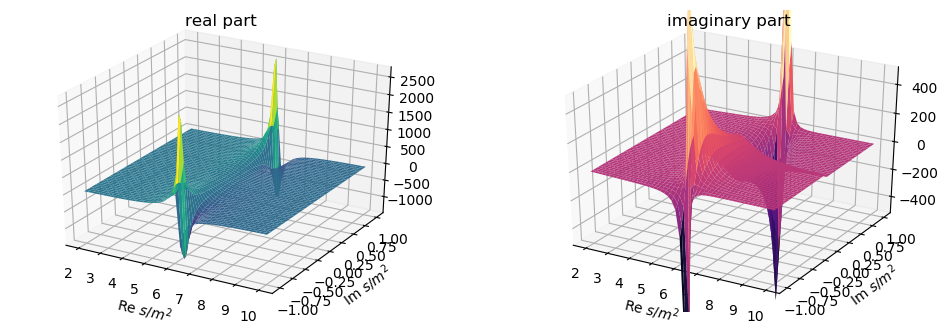

In [9]:
# Second sheet amplitude
def AmplitudeII( s, Kmatrix ):
    amp = Amplitude( s, Kmatrix )
    rho = phase_space( s )
    return amp / ( 1.0 + 2.0 * 1j * rho * amp )

# Denominator of amplitude
def denom_AmplitudeII( s, Kmatrix ):
    amp = Amplitude( s, Kmatrix )
    rho = phase_space( s )
    return 1.0 + 2.0 * 1j * rho * amp

# 3D plot of amplitude II
def amplitudeII_argand_plot_3D(Kmatrix):
    xmin, xmax, xnum = 2, 10, 50                        # units of m
    ymin, ymax, ynum = -1, 1, 50                        # units of m
    zmin, zmax = -500, 500
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    amp = AmplitudeII( Z, Kmatrix )
    ax1 = plt.gcf().add_subplot(121, projection='3d')
    ax2 = plt.gcf().add_subplot(122, projection='3d')
    ax1.plot_surface(X, Y, np.real(amp), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'Re $s / m^2$')
    ax1.set_ylabel(r'Im $s / m^2$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(amp), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'Re $s / m^2$')
    ax2.set_ylabel(r'Im $s / m^2$')
    ax2.set_zlim(zmin,zmax)
    ax2.set_title('imaginary part')

# Making plot
plt.figure(figsize=(12,4), dpi= 100)
amplitudeII_argand_plot_3D(lambda s:Kmatrix_BreitWigner(s,m0,g0))

In [10]:
def root_func_BW(x):
    sr, si = x
    s = sr + 1j*si
    Kmat = lambda s:Kmatrix_BreitWigner(s,m0,g0)
    fcn = denom_AmplitudeII(s, Kmat )
    tmp = [fcn.real,fcn.imag]
    return tmp

result = optimize.fsolve(root_func_BW,[2.5,-0.5])
s_pole = result[0] + 1j*result[1]
print('Resonance pole position: s_p / m^2 = ', s_pole)
mR, GammaR = np.sqrt(s_pole).real, -2*np.sqrt(s_pole).imag
print('Resonance parameters: m_R / m = ', mR, ', Gamma_R / m = ', GammaR )


Resonance pole position: s_p / m^2 =  (6.1341893938562775-0.9049305231374454j)
Resonance parameters: m_R / m =  2.483421863075953 , Gamma_R / m =  0.3643885626490392


In [13]:
# contout integration function
def contour_integrate(func,path):
    result=0.0
    for n in np.arange(len(path)-1):
        z0 = path[n]
        dz = path[n+1]-path[n]
        integrand_real = lambda x: np.real( func(z0+x*dz)*dz )
        integrand_imag = lambda x: np.imag( func(z0+x*dz)*dz )
        result_real = integrate.quad(integrand_real,0.0,1.0)[0] # keep value only
        result_imag = integrate.quad(integrand_imag,0.0,1.0)[0] # keep value only
        result += result_real + 1j*result_imag
    return result

'''
Here we choose a quadrilateral contour, with the corners specified by C1,C2,C3, and C4
'''
# Points on closed contour around the pole
delta = 0.1
C1 = s_pole + delta + 1j * delta
C2 = s_pole - delta + 1j * delta
C3 = s_pole - delta - 1j * delta
C4 = s_pole + delta - 1j * delta
C5 = C1 # close path

C = [C1,C2,C3,C4,C5]

Kmat = lambda s:Kmatrix_BreitWigner(s,m0,g0)
residue = contour_integrate(lambda s:AmplitudeII(s,Kmat),C)  / (2.0*np.pi*1j)
print('Residue at the pole = ', residue)
print('Coupling to channel: c_p / m = ', np.sqrt(residue))

Residue at the pole =  (-155.86377618395647+19.050907627618805j)
Coupling to channel: c_p / m =  (0.7615642661604526+12.507747851449876j)


Text(6.034189393856277, -0.7049305231374454, '$C$')

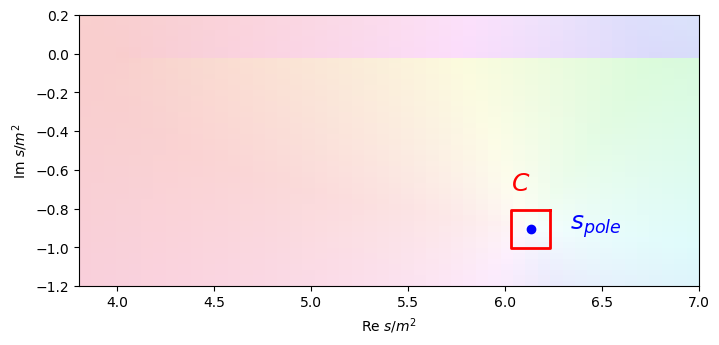

In [130]:
'''
Visualize the pole and coupling
'''

# colorize function
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.5)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)                      # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2)
    c = c.swapaxes(0,1)
    return c

# domain coloring function
def domain_coloring_plot(func):
    xmin, xmax, xnum = 3.8, 7, 50                        # units of m
    ymin, ymax, ynum = -1.2, .2, 50                        # units of m
    zmin, zmax = -500, 500
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    plt.imshow(colorize(func(Z)), origin='lower', vmin=zmin, vmax=zmax, extent=(xmin,xmax,ymin,ymax))
    plt.xlabel(r'Re $s / m^2$')
    plt.ylabel(r'Im $s / m^2$')

# Make plot
plt.figure(figsize=(8,6), dpi= 100)
domain_coloring_plot(lambda s:AmplitudeII(s,Kmat))
plt.plot(np.real(s_pole),np.imag(s_pole),'bo')                                      # put a blue circle at the point s_pole
plt.text(np.real(s_pole)+0.2,np.imag(s_pole),r'$s_{pole}$',fontsize=18,color='b')     # Label the point s_pole
plt.plot(np.real(C),np.imag(C),'r-',lw=2)                                   # draw contour C
plt.text(np.real(C[0])-0.2,np.imag(C[0])+0.1,r'$C$',fontsize=18,color='r')      # Label contour C